In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [55]:
housing = pd.read_csv("train.csv")

In [56]:
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [57]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [58]:
## Lot of null Values
housing.drop(columns =['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id'],inplace=True)

In [59]:
housing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


plt.figure(figsize=(20, 10))
sns.pairplot(housing)
plt.show()

In [60]:
housing['MiscVal'].value_counts().head(30)

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

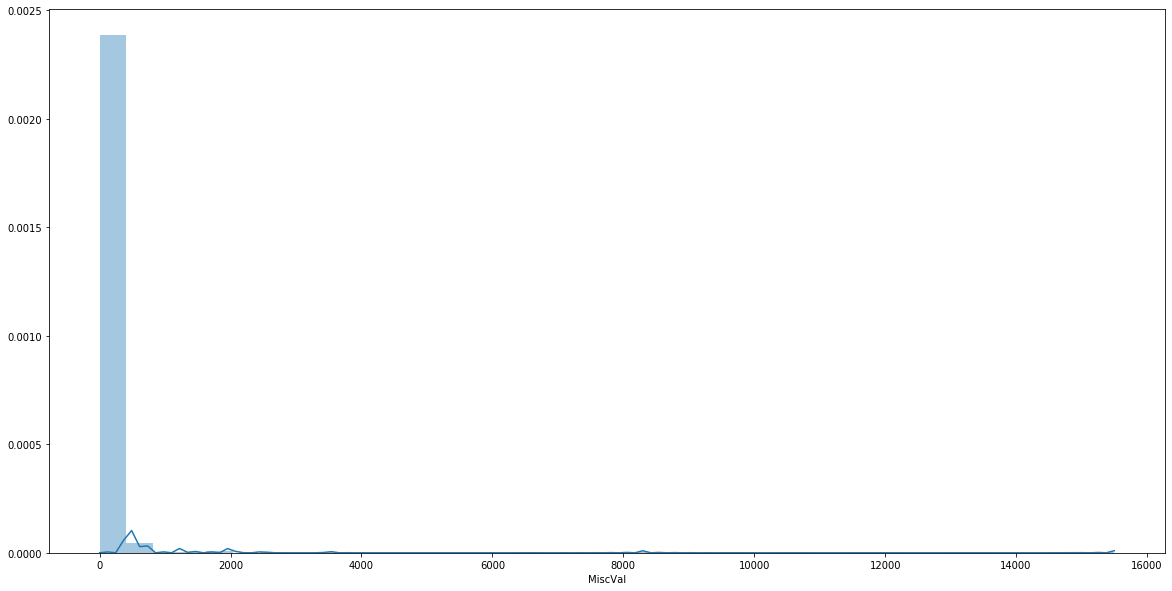

In [61]:
plt.figure(figsize=(20, 10))
sns.distplot(housing['MiscVal'])
plt.show()

In [62]:
## Droping the columns which are highly skewed
housing.drop(columns =['LotArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],inplace=True)

In [63]:
housing

,MSSubClass,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,Y,0,61,0,2,2008,WD,Normal,208500
1,20,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,Y,298,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,Y,0,42,0,9,2008,WD,Normal,223500
3,70,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,Y,0,35,272,2,2006,WD,Abnorml,140000
4,60,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,Y,192,84,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,TA,Y,0,40,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,TA,Y,349,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,TA,Y,0,60,0,5,2010,WD,Normal,266500
1458,20,RL,68.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,Y,366,0,112,4,2010,WD,Normal,142125


plt.figure(figsize=(20, 10))
sns.pairplot(housing)
plt.show()

In [64]:
# Find Missing Ratio of Dataset
housing_na_data = (housing.isnull().sum() / len(housing)) * 100
housing_na_data = housing_na_data.drop(housing_na_data[housing_na_data == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :housing_na_data})
missing_data

,Missing Ratio
FireplaceQu,47.260274
LotFrontage,17.739726
GarageCond,5.547945
GarageQual,5.547945
GarageFinish,5.547945
GarageYrBlt,5.547945
GarageType,5.547945
BsmtFinType2,2.602740
BsmtExposure,2.602740
BsmtFinType1,2.534247


In [65]:
## Data Correction (converting all the 'Null' values to 'No' as they were supposed to mean that there is no Basement)
## housing['FireplaceQu'] = housing.FireplaceQu.fillna("No") 

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1'):
    housing[col] = housing[col].fillna('None')

In [66]:
## Replacing nul values with me median
housing.LotFrontage.isnull().sum()
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing.LotFrontage.median())
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)

In [67]:
# Find Missing Ratio of Dataset
housing_na_data = (housing.isnull().sum() / len(housing)) * 100
housing_na_data = housing_na_data.drop(housing_na_data[housing_na_data == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :housing_na_data})
missing_data

,Missing Ratio
MasVnrArea,0.547945
MasVnrType,0.547945
Electrical,0.068493


In [68]:
housing = housing.dropna()

In [69]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 67 columns):
MSSubClass       1451 non-null int64
MSZoning         1451 non-null object
LotFrontage      1451 non-null float64
Street           1451 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null int64
OverallCond      1451 non-null int64
YearBuilt        1451 non-null int64
YearRemodAdd     1451 non-null int64
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non-null object
Exterior2nd      1451 non-null object
MasVnrType       1451 non-null object
MasVnrArea       1451 n

In [70]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = housing.select_dtypes(include=['object'])
housing_categorical

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal


In [71]:
housing_numerical = housing.select_dtypes(include=['float64', 'int64'])
housing_numerical

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
0,60,65.0,7,5,2003,2003,196.0,706,150,856,...,0,2003.0,2,548,0,61,0,2,2008,208500
1,20,80.0,6,8,1976,1976,0.0,978,284,1262,...,1,1976.0,2,460,298,0,0,5,2007,181500
2,60,68.0,7,5,2001,2002,162.0,486,434,920,...,1,2001.0,2,608,0,42,0,9,2008,223500
3,70,60.0,7,5,1915,1970,0.0,216,540,756,...,1,1998.0,3,642,0,35,272,2,2006,140000
4,60,84.0,8,5,2000,2000,350.0,655,490,1145,...,1,2000.0,3,836,192,84,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,6,5,1999,2000,0.0,0,953,953,...,1,1999.0,2,460,0,40,0,8,2007,175000
1456,20,85.0,6,6,1978,1988,119.0,790,589,1542,...,2,1978.0,2,500,349,0,0,2,2010,210000
1457,70,66.0,7,9,1941,2006,0.0,275,877,1152,...,2,1941.0,1,252,0,60,0,5,2010,266500
1458,20,68.0,5,6,1950,1996,0.0,49,0,1078,...,0,1950.0,1,240,366,0,112,4,2010,142125


In [72]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [73]:
# drop categorical variables 
housing = housing.drop(list(housing_categorical.columns), axis=1)

In [74]:
# concat dummy variables with X
housing = pd.concat([housing, housing_dummies], axis=1)

In [75]:
housing.head()

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,7,5,2003,2003,196.0,706,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,6,8,1976,1976,0.0,978,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,7,5,2001,2002,162.0,486,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,7,5,1915,1970,0.0,216,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,8,5,2000,2000,350.0,655,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [77]:
housing[housing_numerical.columns] = scaler.fit_transform(housing[housing_numerical.columns])

housing.head()

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.064212,0.140098,...,0,0,0,0,1,0,0,0,1,0
1,0.000000,0.202055,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.121575,0.206547,...,0,0,0,0,1,0,0,0,1,0
2,0.235294,0.160959,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.185788,0.150573,...,0,0,0,0,1,0,0,0,1,0
3,0.294118,0.133562,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.231164,0.123732,...,0,0,0,0,1,0,0,0,0,0
4,0.235294,0.215753,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.209760,0.187398,...,0,0,0,0,1,0,0,0,1,0


# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = housing.columns
housing = pd.DataFrame(scale(housing))
housing.columns = cols
housing.columns

In [78]:
# Dividing The training data into X and y variables where X are the Predictor Variables and Y is the Target Variable
y_housing = housing.pop('SalePrice')
X_housing = housing

In [79]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE

In [80]:
# Running RFE with the output number of the variable equal to 75
lm = LinearRegression()
lm.fit(X_housing, y_housing)

rfe = RFE(lm, 75)             # running RFE
rfe = rfe.fit(X_housing, y_housing)

In [81]:
list(zip(X_housing.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 53),
 ('MasVnrArea', False, 12),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 15),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', False, 4),
 ('BsmtFullBath', False, 25),
 ('FullBath', False, 32),
 ('HalfBath', False, 154),
 ('BedroomAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 9),
 ('Fireplaces', False, 20),
 ('GarageYrBlt', False, 27),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 14),
 ('OpenPorchSF', False, 138),
 ('EnclosedPorch', False, 124),
 ('MoSold', False, 72),
 ('YrSold', False, 122),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', False, 2),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', False, 3),
 ('Street_Pave', False, 44),
 ('LotShape_IR2', False, 68),
 ('LotShape_IR3', False, 38),
 ('LotShape_Reg', False, 140),
 ('LandContour_HLS', False, 54),
 ('La

In [82]:
col_rfe = X_housing.columns[rfe.support_]
col_rfe

Index(['MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr',
       'GarageCars', 'GarageArea', 'MSZoning_FV', 'MSZoning_RL',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Condition1_RRAe', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'BldgType_Duplex',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior2nd_CBlock', 'Exterior2nd_Other',
       'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_Wood',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA',
       'BsmtCond_None', 'BsmtExposure_Gd', 'BsmtFinType1_None',
       'BsmtFinType2_None', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav',
       'Heating_

In [83]:
X_housing_rfe = X_housing[col_rfe]
X_housing_rfe

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,BedroomAbvGr,...,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,SaleType_Con,SaleType_New,SaleCondition_Partial
0,0.235294,0.150685,0.666667,0.500,0.949275,0.125089,0.140098,0.119780,0.413559,0.375,...,0,1,0,0,0,0,1,0,0,0
1,0.000000,0.202055,0.555556,0.875,0.753623,0.173281,0.206547,0.212942,0.000000,0.375,...,0,1,0,0,0,0,1,0,0,0
2,0.235294,0.160959,0.666667,0.500,0.934783,0.086109,0.150573,0.134465,0.419370,0.375,...,0,1,0,0,0,0,1,0,0,0
3,0.294118,0.133562,0.666667,0.500,0.311594,0.038271,0.123732,0.143873,0.366102,0.375,...,0,1,0,0,0,0,1,0,0,0
4,0.235294,0.215753,0.777778,0.500,0.927536,0.116052,0.187398,0.186095,0.509927,0.500,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.555556,0.500,0.920290,0.000000,0.155974,0.142038,0.336077,0.375,...,0,1,0,0,0,0,1,0,0,0
1456,0.000000,0.219178,0.555556,0.625,0.768116,0.139972,0.252373,0.399036,0.000000,0.375,...,0,1,0,0,0,0,1,0,0,0
1457,0.294118,0.154110,0.666667,1.000,0.500000,0.048724,0.188543,0.195961,0.557869,0.500,...,0,1,0,0,0,0,1,0,0,0
1458,0.000000,0.160959,0.444444,0.625,0.565217,0.008682,0.176432,0.170721,0.000000,0.250,...,0,1,0,0,0,0,1,0,0,0


# Ridge

In [84]:
import random

list_alpha = []

for i in range(100):
    x = round(random.uniform(0.0,0.00015), 6)
    list_alpha.append(x)
    
list_alpha.sort()
list_alpha


params1 = {'alpha': [1e-15, 1e-10, 1e-8, 1e-2, 1, 4, 10]}
params = {'alpha' : list_alpha}

ridge = Ridge()
# list of alphas to tune
#params = {'alpha': [0.0001, 0.001, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.1,  
#0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]}


folds = 5

In [85]:
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_housing_rfe, y_housing)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 4, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [86]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022740,0.006617,0.001204,0.000984,1e-15,{'alpha': 1e-15},-0.031172,-0.023355,-0.027315,-0.021778,...,-0.026368,0.003392,6,-0.022014,-0.021741,-0.021047,-0.022088,-0.021726,-0.021723,0.000368
1,0.004189,0.001162,0.001196,0.000399,1e-10,{'alpha': 1e-10},-0.030262,-0.023372,-0.027057,-0.021778,...,-0.025795,0.002969,4,-0.022014,-0.021741,-0.021047,-0.022088,-0.021726,-0.021723,0.000368
2,0.002993,0.000631,0.001196,0.000399,1e-08,{'alpha': 1e-08},-0.030262,-0.023372,-0.027057,-0.021778,...,-0.025795,0.002969,3,-0.022014,-0.021741,-0.021047,-0.022088,-0.021726,-0.021723,0.000368
3,0.004388,0.000488,0.001995,0.000631,0.01,{'alpha': 0.01},-0.029587,-0.023374,-0.026728,-0.021684,...,-0.025573,0.002766,2,-0.022018,-0.021724,-0.021026,-0.022119,-0.021735,-0.021725,0.000382
4,0.003357,0.000817,0.000997,0.000631,1,{'alpha': 1},-0.024603,-0.026204,-0.026718,-0.023543,...,-0.025347,0.001142,1,-0.024096,-0.023778,-0.023513,-0.024376,-0.022165,-0.023586,0.000767


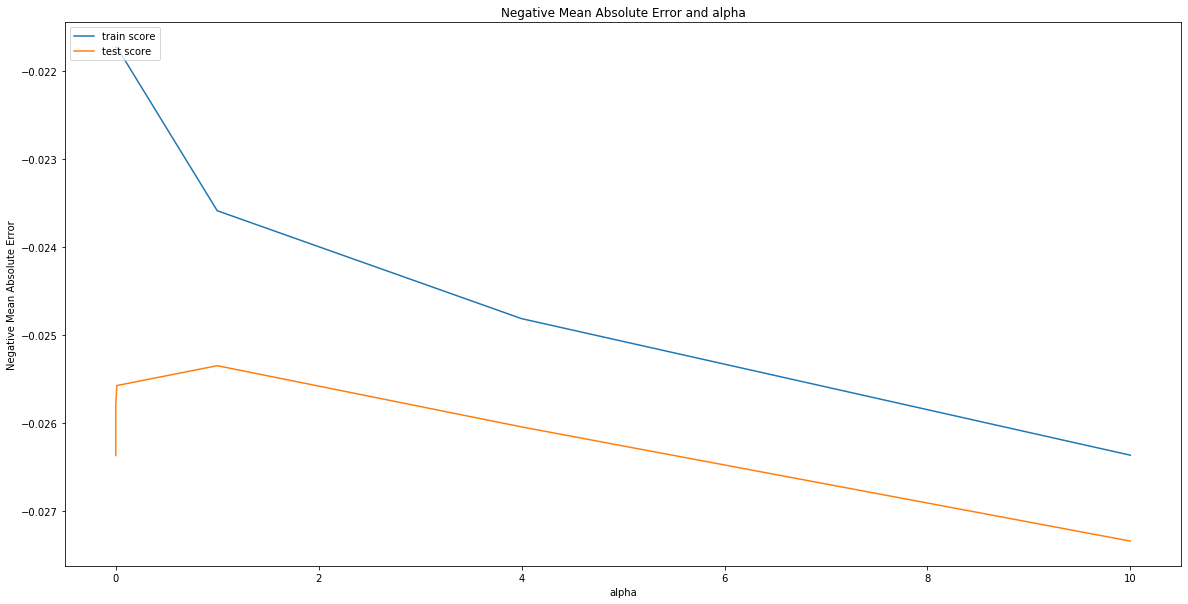

In [87]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(20, 10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [88]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 1}
-0.02534727882137756


In [89]:
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_housing_rfe, y_housing)
ridge.coef_

array([-0.04359105, -0.02765023,  0.11934796,  0.06461401,  0.04605073,
        0.08934526,  0.0759671 ,  0.25131353,  0.13980744,  0.00649534,
        0.07594017,  0.01189364,  0.02897722,  0.01228795,  0.04277904,
        0.07656481,  0.04337252,  0.06669361, -0.02264058,  0.02871999,
       -0.16594189, -0.01391935, -0.01817795,  0.01448572,  0.0805069 ,
        0.06167812,  0.04914512,  0.03980985,  0.06627417,  0.07230138,
        0.16467236, -0.00425038, -0.02246787, -0.00425038, -0.01693219,
       -0.02316186, -0.01988499, -0.02821215, -0.01732773, -0.04545146,
       -0.03474178, -0.01045091, -0.03978885, -0.01045091,  0.04023836,
       -0.01045091, -0.00578543,  0.0088514 ,  0.01876874,  0.00228093,
        0.02354175, -0.04213199, -0.04174231, -0.04525568, -0.0407063 ,
        0.0207519 ,  0.01556401,  0.02431848,  0.01406193,  0.01474383,
        0.00275606,  0.00275606, -0.03768161, -0.01406809,  0.00275606,
       -0.01922352, -0.03289691,  0.00351393,  0.00087388,  0.00

## Lasso

In [90]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_housing_rfe, y_housing)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [5e-06, 7e-06, 9e-06, 1e-05, 1.2e-05, 1.5e-05,
                                   1.6e-05, 1.8e-05, 1.9e-05, 2e-05, 2e-05,
                                   2.1e-05, 2.2e-05, 2.2e-05, 2.5e-05, 2.9e-05,
                                   2.9e-05, 3e-05, 3e-05, 3.1e-05, 3.1e-05,
                                   3.3e-05, 3.4e-05, 3.4e-05, 3.7e-05, 3.9e-05,
                                   3.9e-05, 4.1e-05, 4.3e-05, 4.7e-05, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [91]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.049565,0.025419,0.000399,0.000489,5e-06,{'alpha': 5e-06},-0.029721,-0.023427,-0.026692,-0.021845,...,-0.025603,0.002740,100,-0.022048,-0.021820,-0.021136,-0.022239,-0.021805,-0.021810,0.000373
1,0.035616,0.017739,0.003125,0.006250,7e-06,{'alpha': 7e-06},-0.029529,-0.023470,-0.026551,-0.021849,...,-0.025542,0.002663,99,-0.022069,-0.021887,-0.021186,-0.022289,-0.021860,-0.021858,0.000369
2,0.030723,0.011062,0.000000,0.000000,9e-06,{'alpha': 9e-06},-0.029336,-0.023567,-0.026404,-0.021857,...,-0.025487,0.002575,98,-0.022095,-0.021926,-0.021239,-0.022340,-0.021897,-0.021899,0.000366
3,0.029422,0.012312,0.003124,0.006249,1e-05,{'alpha': 1e-05},-0.029241,-0.023615,-0.026312,-0.021851,...,-0.025454,0.002533,97,-0.022111,-0.021941,-0.021256,-0.022361,-0.021911,-0.021916,0.000367
4,0.036805,0.011283,0.000200,0.000400,1.2e-05,{'alpha': 1.2e-05},-0.029059,-0.023714,-0.026154,-0.021842,...,-0.025398,0.002455,88,-0.022143,-0.021982,-0.021283,-0.022407,-0.021955,-0.021954,0.000372


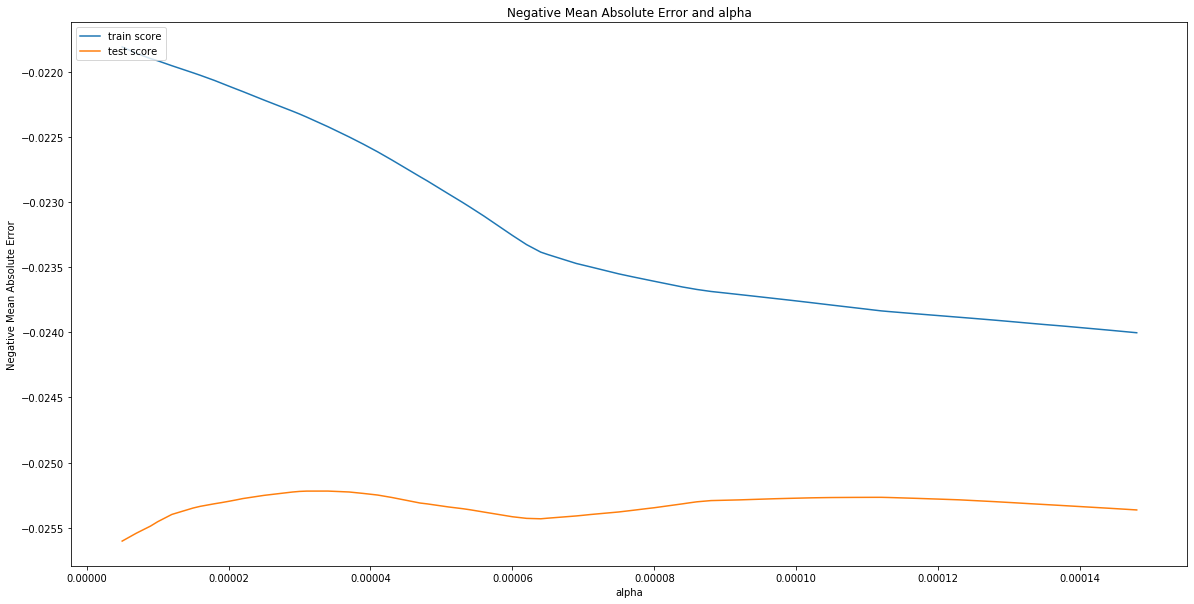

In [92]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(20, 10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [93]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 3.4e-05}
-0.02521878544562607


In [94]:
alpha = 3.1e-05

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_housing_rfe, y_housing)

Lasso(alpha=3.1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [95]:
lasso.coef_

array([-3.95919523e-02, -0.00000000e+00,  1.15934155e-01,  7.00002105e-02,
        6.13063761e-02,  1.19578940e-01,  8.41077184e-02,  3.36237312e-01,
        1.64821159e-01, -1.84214802e-02,  5.77420943e-02,  9.91151193e-03,
        2.58030895e-02,  9.61105330e-03,  3.80765144e-02,  6.60079174e-02,
        3.94233910e-02,  6.08210209e-02, -2.22554590e-02,  0.00000000e+00,
       -2.64869349e-01, -0.00000000e+00, -2.27158237e-02,  0.00000000e+00,
        4.26499890e-01,  4.29405468e-01,  4.01861129e-01,  3.77757723e-01,
        4.08948136e-01,  4.14394755e-01,  5.23547245e-01, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -2.36052323e-02,
       -2.35939986e-02, -3.08674842e-02, -1.64726617e-02, -3.74128358e-02,
       -3.05092985e-02, -1.47545259e-02, -3.36859491e-02, -9.24221319e-03,
        3.65774667e-02, -2.29382671e-04, -1.90152382e-03,  0.00000000e+00,
        3.87319311e-03, -0.00000000e+00,  1.14276387e-02, -3.69308758e-02,
       -3.88706192e-02, -